# Data Overview

###### Tianyi Zheng, tiz65@pitt.edu, February 27, 2022

This Jupyter notebook provides a general overview of the data processing and analysis workflow for the PELIC dataset.
Because the original data has already been cleaned and organized, the workflow fairly straightforward, which is something that I'm very grateful for.

## Data Processing

Import Python modules and PELIC CSV file data processing:

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
pelic = pd.read_csv("data/PELIC_compiled.csv")
pelic.info()
pelic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46204 entries, 0 to 46203
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answer_id       46204 non-null  int64  
 1   anon_id         46204 non-null  object 
 2   L1              46204 non-null  object 
 3   gender          46204 non-null  object 
 4   semester        46204 non-null  object 
 5   placement_test  23563 non-null  float64
 6   course_id       46204 non-null  int64  
 7   level_id        46204 non-null  int64  
 8   class_id        46204 non-null  object 
 9   question_id     46204 non-null  int64  
 10  version         46204 non-null  int64  
 11  text_len        46204 non-null  int64  
 12  text            46204 non-null  object 
 13  tokens          46204 non-null  object 
 14  tok_lem_POS     46204 non-null  object 
dtypes: float64(1), int64(6), object(8)
memory usage: 5.3+ MB


,answer_id,anon_id,L1,gender,semester,placement_test,course_id,level_id,class_id,question_id,version,text_len,text,tokens,tok_lem_POS
0,1,eq0,Arabic,Male,2006_fall,NaN,149,4,g,5,1,177,I met my friend Nife while I was studying in a...,"['I', 'met', 'my', 'friend', 'Nife', 'while', ...","[('I', 'I', 'PRP'), ('met', 'meet', 'VBD'), ('..."
1,2,am8,Thai,Female,2006_fall,NaN,149,4,g,5,1,137,"Ten years ago, I met a women on the train betw...","['Ten', 'years', 'ago', ',', 'I', 'met', 'a', ...","[('Ten', 'ten', 'CD'), ('years', 'year', 'NNS'..."
2,3,dk5,Turkish,Female,2006_fall,NaN,115,4,w,12,1,63,In my country we usually don't use tea bags. F...,"['In', 'my', 'country', 'we', 'usually', 'do',...","[('In', 'in', 'IN'), ('my', 'my', 'PRP$'), ('c..."
3,4,dk5,Turkish,Female,2006_fall,NaN,115,4,w,13,1,6,I organized the instructions by time.,"['I', 'organized', 'the', 'instructions', 'by'...","[('I', 'I', 'PRP'), ('organized', 'organize', ..."
4,5,ad1,Korean,Female,2006_fall,NaN,115,4,w,12,1,59,"First, prepare a port, loose tea, and cup.\nSe...","['First', ',', 'prepare', 'a', 'port', ',', 'l...","[('First', 'first', 'RB'), (',', ',', ','), ('..."


Since `answer_id` is unique for each row, make that the index:

In [229]:
pelic = pelic.set_index("answer_id")
pelic.info()
pelic.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46204 entries, 1 to 48420
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anon_id         46204 non-null  object 
 1   L1              46204 non-null  object 
 2   gender          46204 non-null  object 
 3   semester        46204 non-null  object 
 4   placement_test  23563 non-null  float64
 5   course_id       46204 non-null  int64  
 6   level_id        46204 non-null  int64  
 7   class_id        46204 non-null  object 
 8   question_id     46204 non-null  int64  
 9   version         46204 non-null  int64  
 10  text_len        46204 non-null  int64  
 11  text            46204 non-null  object 
 12  tokens          46204 non-null  object 
 13  tok_lem_POS     46204 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 5.3+ MB


,anon_id,L1,gender,semester,placement_test,course_id,level_id,class_id,question_id,version,text_len,text,tokens,tok_lem_POS
answer_id,,,,,,,,,,,,,,
1,eq0,Arabic,Male,2006_fall,NaN,149,4,g,5,1,177,I met my friend Nife while I was studying in a...,"['I', 'met', 'my', 'friend', 'Nife', 'while', ...","[('I', 'I', 'PRP'), ('met', 'meet', 'VBD'), ('..."
2,am8,Thai,Female,2006_fall,NaN,149,4,g,5,1,137,"Ten years ago, I met a women on the train betw...","['Ten', 'years', 'ago', ',', 'I', 'met', 'a', ...","[('Ten', 'ten', 'CD'), ('years', 'year', 'NNS'..."
3,dk5,Turkish,Female,2006_fall,NaN,115,4,w,12,1,63,In my country we usually don't use tea bags. F...,"['In', 'my', 'country', 'we', 'usually', 'do',...","[('In', 'in', 'IN'), ('my', 'my', 'PRP$'), ('c..."
4,dk5,Turkish,Female,2006_fall,NaN,115,4,w,13,1,6,I organized the instructions by time.,"['I', 'organized', 'the', 'instructions', 'by'...","[('I', 'I', 'PRP'), ('organized', 'organize', ..."
5,ad1,Korean,Female,2006_fall,NaN,115,4,w,12,1,59,"First, prepare a port, loose tea, and cup.\nSe...","['First', ',', 'prepare', 'a', 'port', ',', 'l...","[('First', 'first', 'RB'), (',', ',', ','), ('..."


`tokens`, `tok_lem_POS`, and their elements were all automatically (and correctly) processed:

In [230]:
print(f"tokens: {type(pelic.tokens[1]).__name__}"
      f"[{type(pelic.tokens[1][0]).__name__}]")
print(f"tok_lem_POS: {type(pelic.tok_lem_POS[1]).__name__}"
      f"[{type(pelic.tok_lem_POS[1][0]).__name__}"
      f"[{type(pelic.tok_lem_POS[1][0][0]).__name__}]]")

tokens: str[str]
tok_lem_POS: str[str[str]]


## Basis Statistics

In [231]:
pelic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46204 entries, 1 to 48420
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anon_id         46204 non-null  object 
 1   L1              46204 non-null  object 
 2   gender          46204 non-null  object 
 3   semester        46204 non-null  object 
 4   placement_test  23563 non-null  float64
 5   course_id       46204 non-null  int64  
 6   level_id        46204 non-null  int64  
 7   class_id        46204 non-null  object 
 8   question_id     46204 non-null  int64  
 9   version         46204 non-null  int64  
 10  text_len        46204 non-null  int64  
 11  text            46204 non-null  object 
 12  tokens          46204 non-null  object 
 13  tok_lem_POS     46204 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 6.3+ MB


There are 46,204 entries but the indices go from 1 to 48,420, so there must be at least 2,216 `answer_id`s missing from the dataset:

In [232]:
answer_ids = set(pelic.index.values)
missing_answer_ids = [n for n in range(1, max(answer_ids) + 1) if
                      n not in answer_ids]
print(missing_answer_ids[:20])

[43, 48, 49, 50, 57, 58, 59, 63, 64, 65, 81, 82, 83, 98, 100, 102, 103, 144, 180, 186]


I'm assuming that the entries corresponding to these missing `answer_id`s were removed because they were from teachers, because they were too low-quality, or some other reason.

Since this project will require analyzing students' L1 and proficiency level, below are the student counts broken down by L1 and proficiency level:

In [233]:
print("L1 Counts:")
L1_counts = pelic.drop_duplicates("anon_id").L1.value_counts()
L1_counts = L1_counts.reset_index()
L1_counts.rename(columns={"L1": "Count", "index": "L1"}, inplace=True)
L1_counts

L1 Counts:


,L1,Count
0,Arabic,439
1,Chinese,220
2,Korean,214
3,Japanese,67
4,Spanish,57
5,Turkish,40
6,Thai,31
7,Portuguese,17
8,Other,14
9,Italian,12


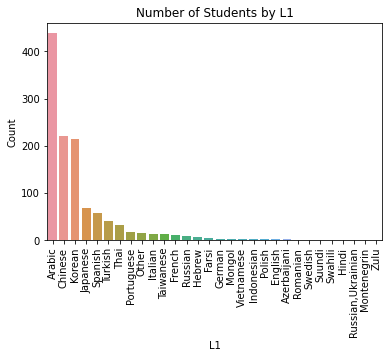

In [234]:
sns.barplot(
    data = L1_counts,
    x="L1",
    y="Count"
).set(title="Number of Students by L1")
plt.xticks(rotation=90)
plt.show()

Arabic, Chinese, and Korean students comprise the vast majority of the dataset, with the counts of the other L1s drastically tapering off thereafter.

In [235]:
print("Proficiency Level Counts:")
level_counts = pelic.drop_duplicates("anon_id").level_id.value_counts()
level_counts = level_counts.reset_index()
level_counts.rename(columns={"level_id": "Count", "index": "Level"}, inplace=True)
level_counts

Proficiency Level Counts:


,Level,Count
0,4,524
1,3,474
2,5,151
3,2,28


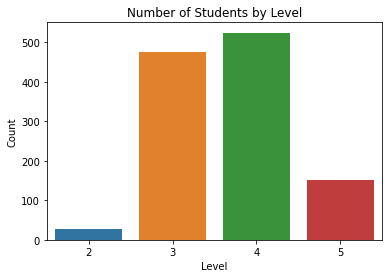

In [240]:
sns.barplot(
    data = level_counts,
    x="Level",
    y="Count"
).set(title="Number of Students by Level")
plt.show()

It's clear from the graph that the vast majority of the students are intermediate or above (B1 or higher) in terms of proficiency level, with very few students being pre-intermediate (A2-B1).

In [237]:
print("L1 and Proficiency Counts:")
L1_level_counts = pelic.groupby(["L1", "level_id"])["anon_id"].nunique()
L1_level_counts = L1_level_counts.reset_index()
L1_level_counts.rename(columns={"level_id": "Level", "anon_id": "Count"}, inplace=True)
L1_level_counts["Percentage"] = L1_level_counts["Count"] / L1_level_counts.groupby("L1")["Count"].transform("sum") * 100
L1_level_counts

L1 and Proficiency Counts:


,L1,Level,Count,Percentage
0,Arabic,2,15,1.845018
1,Arabic,3,244,30.012300
2,Arabic,4,342,42.066421
3,Arabic,5,212,26.076261
4,Azerbaijani,3,1,50.000000
...,...,...,...,...
74,Turkish,5,12,17.647059
75,Vietnamese,2,1,20.000000
76,Vietnamese,3,1,20.000000
77,Vietnamese,4,3,60.000000


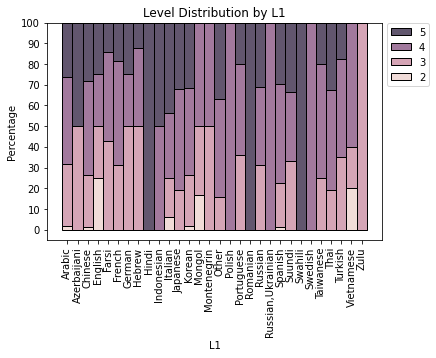

In [252]:
sns.histplot(
    data = L1_level_counts,
    x="L1",
    weights="Percentage",
    hue="Level",
    multiple="stack",
).set(title="Level Distribution by L1")
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.ylabel("Percentage")
plt.yticks(range(0, 101, 10), range(100, -1, -10))  # Really hacky way to reverse the bars
plt.legend(labels = [5, 4, 3, 2], bbox_to_anchor = (1, 1.02))
plt.show()

Apart from the aforementioned fact that most students are at the intermediate to advanced level, the stacked bar plot also shows that the L1s with the highest counts (Arabic, Chinese, etc.) tend to have much more balanced distributions than those with far lower counts (Vietnamese, Zulu, etc.).

## Data Samples

Since the dataset has tens of thousands of rows, the first 100 will be selected as a sample:

In [239]:
pelic.head(100).to_csv("data_samples/pelic-sample.csv")